**Guided Project: Build an Image Classifier with Python**

In [ ]:
#Here we load the Mnist data from Keras
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#get an idea of shape of train data
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

3


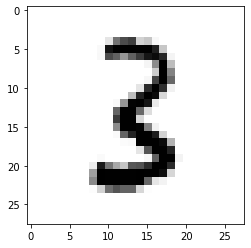

In [ ]:
#Here we preview an element of the data
import matplotlib.pyplot as plt
 # Only use this if using iPython
image_index = 50000 # You may select anything up to 60,000 : 7890,50000
print(y_train[image_index]) # To display the label number
plt.imshow(x_train[image_index], cmap='Greys') #to show the image associated with label

In [ ]:
x_train[image_index] # This is how the computer sees the imaage shown above in its language 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 160, 195,
        205,  71,  86,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 238, 254, 254,
        254, 254, 254, 227,  84,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
x_train[image_index].shape

(28, 28)

In [ ]:
#Reshaping and preprocessing
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
x_train[image_index]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
x_train[image_index].shape ## The data has been sent to a one channel thus it is displayed like this and it is also normalized 

(28, 28, 1)

In [ ]:
#Building to Keras
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential() #chosen Keras model
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) #convolution
model.add(MaxPooling2D(pool_size=(2, 2))) #pooling layer
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation=tf.nn.relu)) #dense layer relu
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax)) #dense layer softmax

In [ ]:
#Compiling and fitting the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2505 - accuracy: 0.9248
Epoch 2/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1083 - accuracy: 0.9669
Epoch 3/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0792 - accuracy: 0.9757
Epoch 4/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0634 - accuracy: 0.9800
Epoch 5/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0517 - accuracy: 0.9833
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0437 - accuracy: 0.9857
Epoch 7/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0373 - accuracy: 0.9880
Epoch 8/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0345 - accuracy: 0.9886
Epoch 9/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0297 - accuracy: 0.9898
Epoch 10/20
1875/1875 [==============================] - 26s 14m

In [ ]:
#evaluating
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0702 - accuracy: 0.9854


[0.07018029689788818, 0.9854000210762024]

6


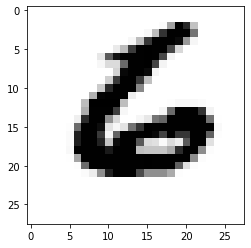

In [ ]:
#testing on test data
image_index = 9999 #choose random value up to 10000 try with ,333, 9999 etc
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())


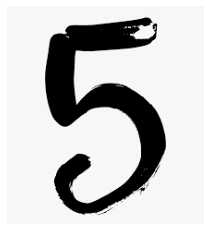

In [ ]:
#Previewing the downloaded image 
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
im = cv2.imread("which2.png")
# Show image
plt.imshow(im, cmap="gray"), plt.axis("off")
plt.show()

In [ ]:
im.shape

(236, 213, 3)

In [ ]:
from tensorflow.keras.preprocessing import image #Import Keras image processor

In [ ]:
#load downloaded image and resze to target size
img = image.load_img("which2.png", target_size=(28, 28),color_mode="grayscale")


In [ ]:
#convert loaded and resized image to array of numbers
img_array = image.img_to_array(img)


In [ ]:
#Confirm new shape
img_array.shape

(28, 28, 1)

In [ ]:
#Convert image array to 2D format that can be predicted upon
img_array = img_array[:,:,0]
img_array.shape

(28, 28)

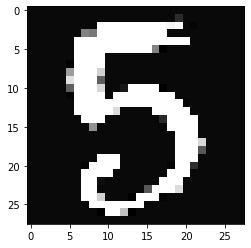

In [ ]:
plt.imshow(img_array,cmap="Greys")

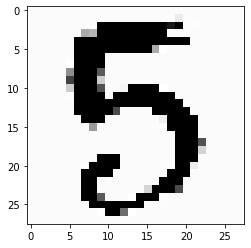

In [ ]:
#invert loaded image array into same format as data used for training
img_array=1-img_array
plt.imshow(img_array,cmap="Greys")

# New Section

5


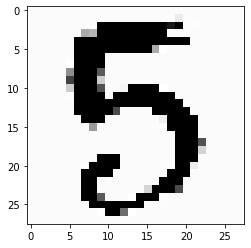

In [ ]:
#Running Prediction on the image

plt.imshow(img_array,cmap="Greys")
pred = model.predict(img_array.reshape(1, 28, 28, 1))
print(pred.argmax())
